<a href="https://colab.research.google.com/github/silfaantony/github-slideshow/blob/master/Covid19sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YOUTUBE COMMENTS**
**Sentiment analysis of covid19 news comments**

In [3]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import sklearn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
#Storing the data
coviddata = pd.read_csv('/content/Dataset.csv')
coviddata

,ID,clean_comments
0,1,"Hmm I'm not a detective, but all signs point t..."
1,2,There is nothing like the smell of dung on you...
2,3,They believe that the Ganges can cure illness.
3,4,They go to these places to prevent them from t...
4,5,@- i am from india but i don't believe on thes...
...,...,...
10507,12326,Please don’t ask for data
10508,12327,"Fyi bbc , it was 9million abt few weeks ago , ..."
10509,12329,This amazing doctor tells the TRUTH on live TV...
10510,12331,Are US and other countries ready for the WW3 i...


Changing to lower case, removing numbers and white spaces

In [12]:
coviddata['clean_comments'] = coviddata['clean_comments'].str.lower()
coviddata['clean_comments'] = coviddata['clean_comments'].str.strip()
coviddata['clean_comments'] = coviddata['clean_comments'].str.replace('\d+', '')

In [13]:
coviddata.head()

,ID,clean_comments,Pol_category
0,1,"hmm i'm not a detective, but all signs point t...",0
1,2,there is nothing like the smell of dung on you...,0
2,3,they believe that the ganges can cure illness.,0
3,4,they go to these places to prevent them from t...,0
4,5,@- i am from india but i don't believe on thes...,0


Removing punctuations

In [14]:
def punct_remove(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
coviddata['clean_comments'] = coviddata['clean_comments'].apply(punct_remove)

In [8]:
coviddata

,ID,clean_comments
0,1,"Hmm I'm not a detective, but all signs point t..."
1,2,There is nothing like the smell of dung on you...
2,3,They believe that the Ganges can cure illness.
3,4,They go to these places to prevent them from t...
4,5,@- i am from india but i don't believe on thes...
...,...,...
10507,12326,Please don’t ask for data
10508,12327,"Fyi bbc , it was 9million abt few weeks ago , ..."
10509,12329,This amazing doctor tells the TRUTH on live TV...
10510,12331,Are US and other countries ready for the WW3 i...


In [16]:
#Function for polarity
def Pol_fn(text):
  return TextBlob(text).sentiment.polarity

#Creating a new column
coviddata['Polarity'] = coviddata['clean_comments'].apply(Pol_fn)

coviddata

,ID,clean_comments,Pol_category,Polarity
0,1,hmm im not a detective but all signs point to ...,0,0.000000
1,2,there is nothing like the smell of dung on you...,0,0.000000
2,3,they believe that the ganges can cure illness,0,0.000000
3,4,they go to these places to prevent them from t...,0,0.600000
4,5,i am from india but i dont believe on these f...,0,0.000000
...,...,...,...,...
10507,12326,please don’t ask for data,0,0.000000
10508,12327,fyi bbc it was million abt few weeks ago now...,0,-0.063889
10509,12329,this amazing doctor tells the truth on live tv...,0,0.368182
10510,12331,are us and other countries ready for the ww in...,0,0.315000


,ID,clean_comments,Pol_category,Polarity
0,1,hmm im not a detective but all signs point to ...,0,0.000000
1,2,there is nothing like the smell of dung on you...,0,0.000000
2,3,they believe that the ganges can cure illness,0,0.000000
3,4,they go to these places to prevent them from t...,0,0.600000
4,5,i am from india but i dont believe on these f...,0,0.000000
...,...,...,...,...
10507,12326,please don’t ask for data,0,0.000000
10508,12327,fyi bbc it was million abt few weeks ago now...,0,-0.063889
10509,12329,this amazing doctor tells the truth on live tv...,0,0.368182
10510,12331,are us and other countries ready for the ww in...,0,0.315000


In [17]:
coviddata['Pol_category'] = 0

In [19]:
coviddata['Pol_category'][coviddata.Polarity > 0] = 1
coviddata['Pol_category'][coviddata.Polarity < 0] = -1
coviddata['Pol_category'][coviddata.Polarity == 0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [20]:
coviddata

,ID,clean_comments,Pol_category,Polarity
0,1,hmm im not a detective but all signs point to ...,0,0.000000
1,2,there is nothing like the smell of dung on you...,0,0.000000
2,3,they believe that the ganges can cure illness,0,0.000000
3,4,they go to these places to prevent them from t...,1,0.600000
4,5,i am from india but i dont believe on these f...,0,0.000000
...,...,...,...,...
10507,12326,please don’t ask for data,0,0.000000
10508,12327,fyi bbc it was million abt few weeks ago now...,-1,-0.063889
10509,12329,this amazing doctor tells the truth on live tv...,1,0.368182
10510,12331,are us and other countries ready for the ww in...,1,0.315000


In [21]:
coviddata['Pol_category'].value_counts()

 1    4180
 0    3597
-1    2735
Name: Pol_category, dtype: int64

Removing stop words and lemmatization

In [22]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
lm=WordNetLemmatizer()
wordsToRemove={'india','bbc','youtube','people','virus','http','com','covid','corona','country','www','bitchute'}
stop_words = set(stopwords.words('english'))
stop_words.update(wordsToRemove)
def remove_stopwords(line):
    word_tokens = nltk.word_tokenize(line)
    word_tokens = [w for w in word_tokens if not w in stop_words]
    lemmat_sentence =[lm.lemmatize(w) for w in word_tokens]
    filtered_sentence = [w for w in lemmat_sentence if not w in stop_words]
    return " ".join(filtered_sentence)
coviddata['stop_comments'] = coviddata['clean_comments'].apply(lambda x : remove_stopwords(x))

In [26]:
coviddata

,ID,clean_comments,Pol_category,Polarity,stop_comments
0,1,hmm im not a detective but all signs point to ...,0,0.000000,hmm im detective sign point crowd bathing rive...
1,2,there is nothing like the smell of dung on you...,0,0.000000,nothing like smell dung skin
2,3,they believe that the ganges can cure illness,0,0.000000,believe ganges cure illness
3,4,they go to these places to prevent them from t...,1,0.600000,go place prevent river kind freaking vaccine g...
4,5,i am from india but i dont believe on these f...,0,0.000000,dont believe foolish thing amd prime minister ...
...,...,...,...,...,...
10507,12326,please don’t ask for data,0,0.000000,please ’ ask data
10508,12327,fyi bbc it was million abt few weeks ago now...,-1,-0.063889,fyi million abt week ago going rising old colo...
10509,12329,this amazing doctor tells the truth on live tv...,1,0.368182,amazing doctor tell truth live tv watch httpsy...
10510,12331,are us and other countries ready for the ww in...,1,0.315000,u ready ww initiated ccp china pls help taiwan...


In [27]:
text_clean = ' '.join(coviddata['stop_comments'])
text_clean = text_clean.split() # to list form
len(text_clean)

147855

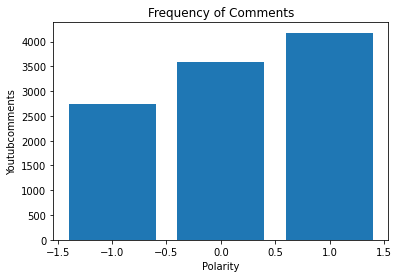

In [31]:
pol_count = coviddata.groupby('Pol_category').count()
plt.bar(pol_count.index.values, pol_count['stop_comments']);
plt.xlabel('Polarity');plt.ylabel('Youtubcomments');plt.title('Frequency of Comments');plt.show()

Wordcloud of 100 frequent words in the comments

In [34]:
def listToString(s):  
    str1 = " " 
    return (str1.join(s)) 
cleantext_wordcloud = listToString(text_clean)

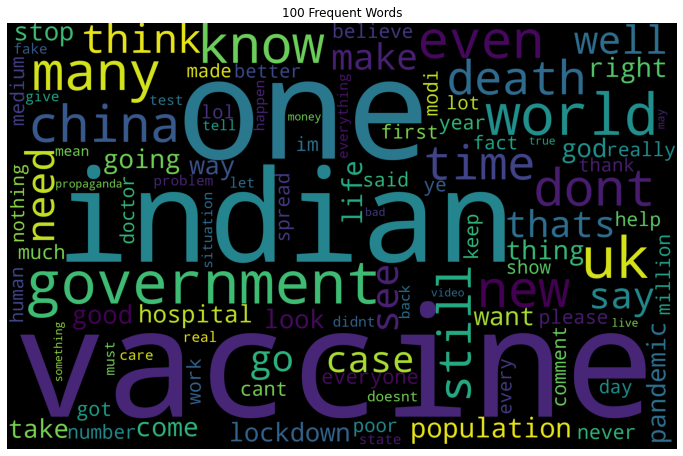

In [35]:
wc=WordCloud(max_words =100,background_color='black',width=2200,height=1400)
word_cloud = wc.generate(cleantext_wordcloud)
plt.figure(figsize = (12,12));plt.imshow(word_cloud);plt.axis("off");plt.title('100 Frequent Words');plt.show()

Wordcloud of 100 frequent words in positive polarity comments

In [38]:
textp = coviddata[coviddata['Pol_category'] == 1]['stop_comments']
textp = ''.join(textp)
textp = textp.split()
cleantextp_wordcloud = listToString(textp)

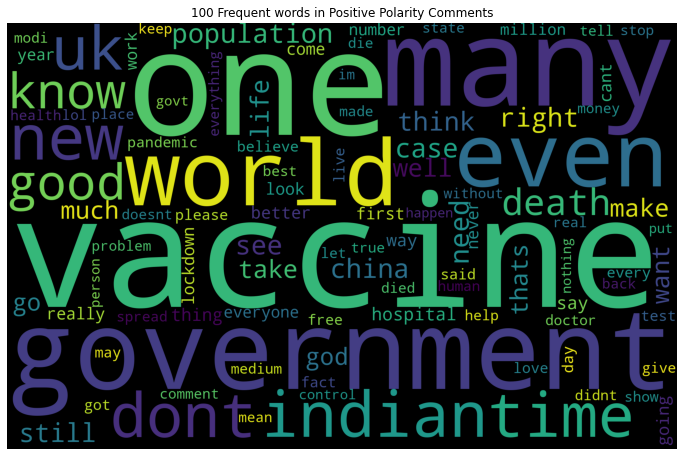

In [39]:
wc=WordCloud(max_words =100,background_color='black',width=2200,height=1400)
word_cloud = wc.generate(cleantextp_wordcloud)
plt.figure(figsize = (12,12));plt.imshow(word_cloud);plt.axis("off");plt.title('100 Frequent words in Positive Polarity Comments');plt.show()

Wordcloud of 100 frequent words in negative polarity comments

In [42]:
textn = coviddata[coviddata['Pol_category'] == -1]['stop_comments']
textn = ''.join(textn)
textn = textn.split()
cleantextn_wordcloud = listToString(textn)

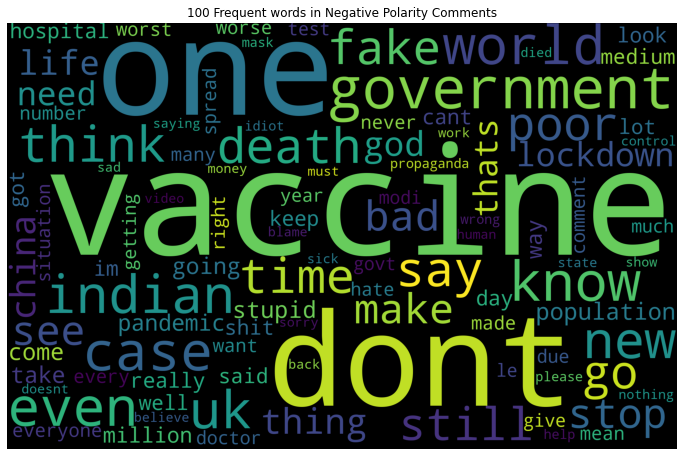

In [43]:
word_cloud = wc.generate(cleantextn_wordcloud)
plt.figure(figsize = (12,12));plt.imshow(word_cloud);plt.axis("off");plt.title('100 Frequent words in Negative Polarity Comments');plt.show()